In [26]:
from datetime import datetime
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytz
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LinearSegmentedColormap, to_rgba
from IPython.display import HTML

In [27]:
file_path = "nsrdb_conus_irradiance_2022.h5"
day_start = pd.to_datetime("2022-08-06 18:00:00", utc=True)
day_end = pd.to_datetime("2022-08-06 18:04:00", utc=True)

In [30]:
with h5py.File(file_path, "r") as f:
    time_index = pd.to_datetime(f["time_index"][...].astype(str))
    timesteps = np.where((time_index >= day_start) & (time_index < day_end))[0]
    ghi = pd.DataFrame(f["ghi"][timesteps][...])
    dni = pd.DataFrame(f["dni"][timesteps][...])
    dhi = pd.DataFrame(f["dhi"][timesteps][...])
    meta = pd.DataFrame(f["meta"][...])

In [31]:
filtered_meta = meta[(meta["country"] == b"United States") & (meta["state"] != b"Hawaii")]
ghi_filtered = ghi.loc[:][filtered_meta.index]
dni_filtered = dni.loc[:][filtered_meta.index]
dhi_filtered = dhi.loc[:][filtered_meta.index]

In [32]:
print(f"GHI: {ghi_filtered.shape}\nMeta: {filtered_meta.shape}\nTime Index: {timesteps.shape}")
print(f"GHI: {dni_filtered.shape}\nMeta: {filtered_meta.shape}\nTime Index: {timesteps.shape}")
print(f"GHI: {dhi_filtered.shape}\nMeta: {filtered_meta.shape}\nTime Index: {timesteps.shape}")

GHI: (1, 2091566)
Meta: (2091566, 8)
Time Index: (1,)
GHI: (1, 2091566)
Meta: (2091566, 8)
Time Index: (1,)
GHI: (1, 2091566)
Meta: (2091566, 8)
Time Index: (1,)


<Figure size 800x600 with 0 Axes>

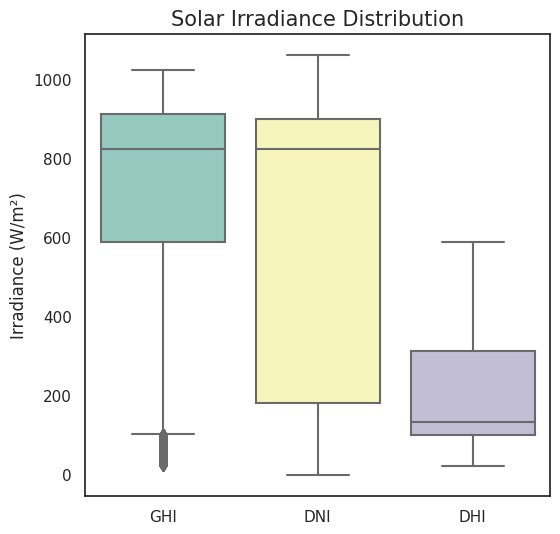

In [35]:
plt.figure(figsize=(8, 6))

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for the plot
sns.set_theme(style="white")

ghi_values = ghi_filtered.values.flatten()
dni_values = dni_filtered.values.flatten()
dhi_values = dhi_filtered.values.flatten()

# Prepare the data for plotting
data_to_plot = [ghi_values, dni_values, dhi_values]
labels = ['GHI', 'DNI', 'DHI']

# Creating the boxplot using Seaborn for a more polished look
plt.figure(figsize=(6, 6))
sns.boxplot(data=data_to_plot, palette="Set3")  # 'Set2' is a predefined Seaborn palette

# Setting the labels and title
plt.xticks(range(3), labels)
plt.title(f'Solar Irradiance Distribution', fontsize=15)
plt.ylabel('Irradiance (W/m²)', fontsize=12)

# Save the plot with a higher resolution
plt.savefig('solar_irradiance_distribution.png', dpi=300)

# Show the plot
plt.show()

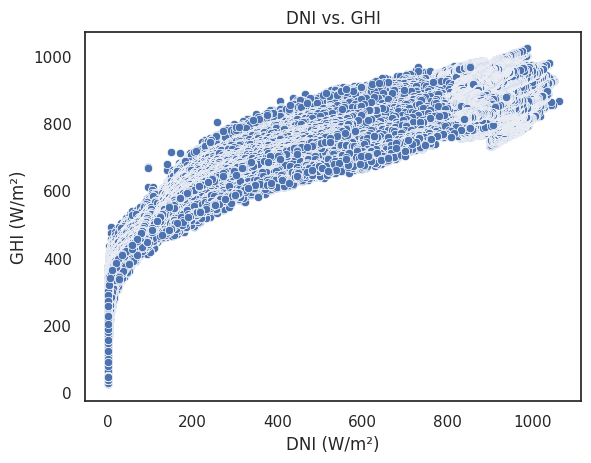

In [45]:
sns.scatterplot(x=dni_values, y=ghi_values)
plt.title('DNI vs. GHI')
plt.xlabel('DNI (W/m²)')
plt.ylabel('GHI (W/m²)')
plt.show()


AttributeError: 'GrouperView' object has no attribute 'join'

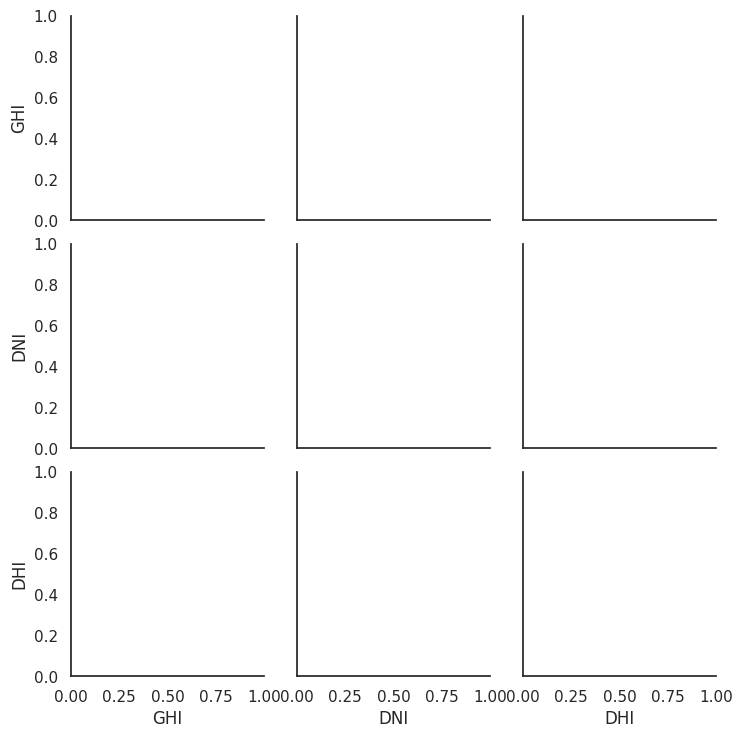

In [46]:
sns.pairplot(pd.DataFrame(data_to_plot, index=['GHI', 'DNI', 'DHI']).T)
plt.show()


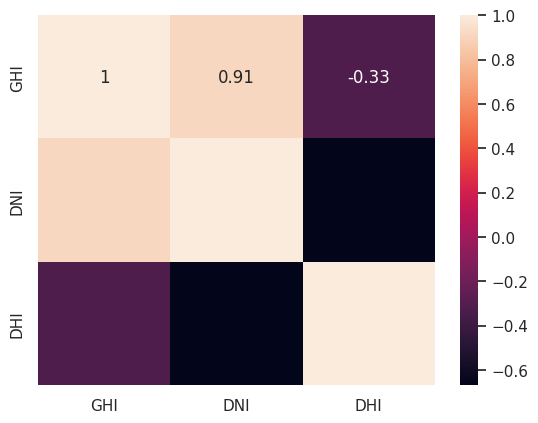

In [47]:
sns.heatmap(pd.DataFrame(data_to_plot, index=['GHI', 'DNI', 'DHI']).T.corr(), annot=True)
plt.show()


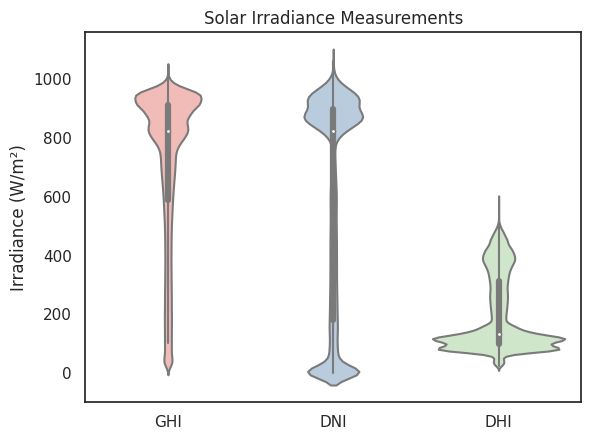

In [48]:
sns.violinplot(data=data_to_plot, palette="Pastel1")
plt.xticks(range(3), labels)
plt.title('Solar Irradiance Measurements')
plt.ylabel('Irradiance (W/m²)')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (105120,) and (2091566,)

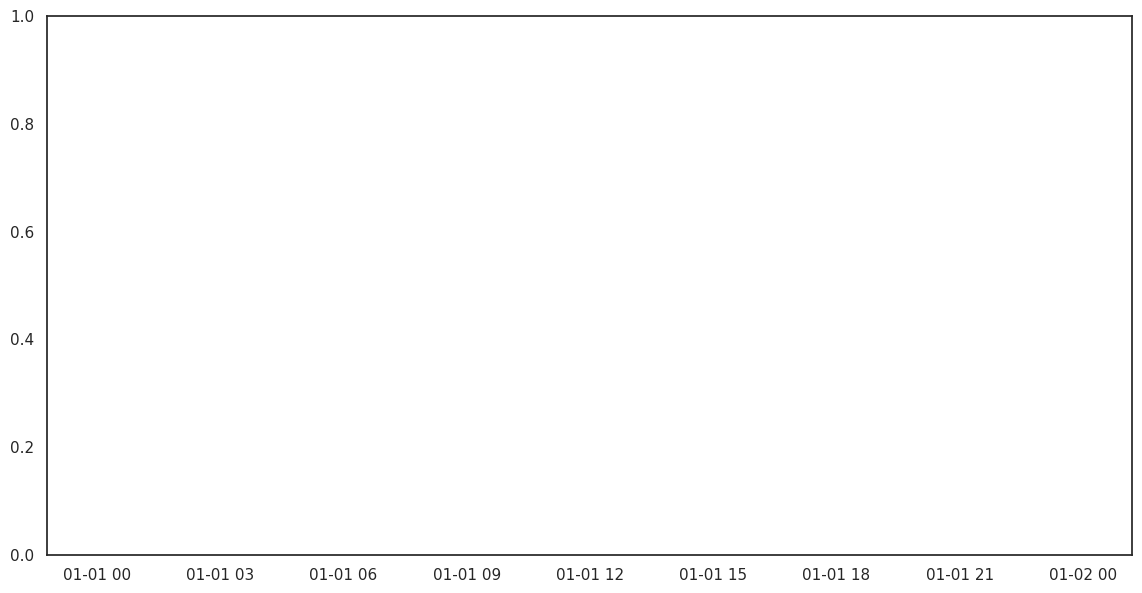

In [49]:
plt.figure(figsize=(14, 7))
plt.plot(time_index, ghi_values, label='GHI')
plt.plot(time_index, dni_values, label='DNI')
plt.plot(time_index, dhi_values, label='DHI')
plt.title('Solar Irradiance Over Time')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.show()
